# <font color='#48A396'>Titanic</font>

# Data analysis

In [1]:
import pandas as pd

In [91]:
Titanic = pd.read_csv('titanic_data.csv')
Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# description

* **survived**: 0=No , 1=Yes.
* **Pclass**(Ticker class) **1=1st** more expensive than **2=2nd** more expensive than **3=3rd**.
* **sibsp**(siblings aboard the titanic).
* **parch**(parents , children aboard the titanic).
* **embarked**(port of embarkation).

In [26]:
Titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

**missing data**
* PassengerId    891
* Survived       891
* Pclass         891
* Name           891
* Sex            891
* **Age**            714
* SibSp          891
* Parch          891
* Ticket         891
* Fare           891
* **Cabin**          204
* **Embarked**       889


**ages range**

In [18]:
Titanic['Age'].min(),Titanic['Age'].max()

(0.42, 80.0)

In [101]:
bins=[0,10,20,30,40,50,60,70,80]
Titanic['Agebin']=pd.cut(Titanic['Age'],bins)
Titanic['Agebin'].value_counts()

(20, 30]    230
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Agebin, dtype: int64

**gender**

In [29]:
Titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [162]:
len(Titanic)

891

In [31]:
Titanic['Sex'].value_counts()*100/len(Titanic)

male      64.758698
female    35.241302
Name: Sex, dtype: float64

**survived**

In [24]:
Titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
Titanic['Survived'].value_counts()*100/len(Titanic)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

**class**

In [32]:
Titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [198]:
len(Titanic)

891

In [33]:
Titanic['Pclass'].value_counts()*100/len(Titanic)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

# Data visualization

In [53]:
import matplotlib.pyplot as plt

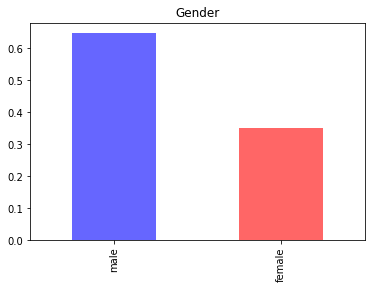

In [84]:
Titanic['Sex'].value_counts(normalize=True).plot(kind='bar',color=['b','r'],alpha=0.6)
plt.title('Gender')
plt.savefig('Gender.png',dpi=120)

the figure describes that about **65%** of the passengers are men and about **35%** women

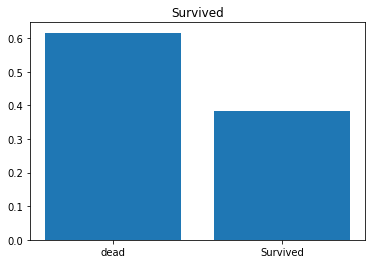

In [83]:
s=Titanic['Survived'].value_counts(normalize=True)
n=['dead','Survived']
plt.bar(n,s)
plt.title('Survived')
plt.savefig('Survived.png',dpi=120)

the figure describes that about **60%** of the passengers has dead and about **40%** survived

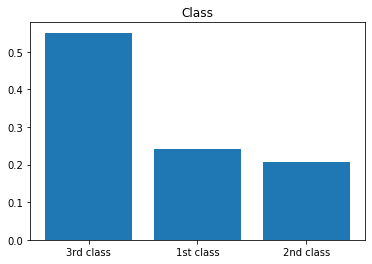

In [89]:
c=Titanic['Pclass'].value_counts(normalize=True)
n=['3rd class','1st class','2nd class']
plt.bar(n,c)
plt.title('Class')
plt.savefig('Class.png',dpi=120)

the figure describes that about **55%** of the passengers were at **3rd class (the cheapest price)**

# data analysis and visualization
* see what factors affects on chance of survive

**Age**

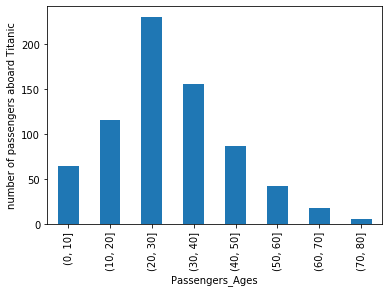

In [144]:
bins=[0,10,20,30,40,50,60,70,80]
Titanic['Agebin']=pd.cut(Titanic['Age'],bins)
Titanic['Agebin'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Passengers_Ages')
plt.ylabel('number of passengers aboard Titanic')
plt.savefig('Passengers_Ages aboard Titanic.png',dpi=120)

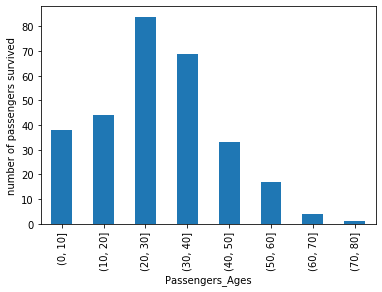

In [143]:
Titanic[Titanic['Survived']==1]['Agebin'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Passengers_Ages')
plt.ylabel('number of passengers survived')
plt.savefig('Passengers_Ages survived.png',dpi=120)

from the above 2 figers we can notice how many passegers could survive in different decades
* in decade [20:30] before the accident there were **230** passengers and after the accident only **84** passengers could survive.

**Gender**

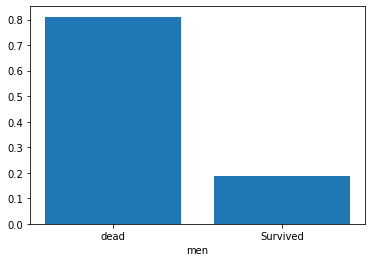

In [194]:
s=Titanic[Titanic['Sex']=='male']['Survived'].value_counts(normalize=True)
n=['dead','Survived']
plt.bar(n,s)
plt.xlabel('men')
plt.savefig('menSurvived.png',dpi=120)

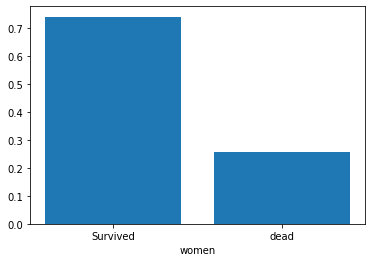

In [186]:
s=Titanic[Titanic['Sex']=='female']['Survived'].value_counts(normalize=True)
n=['Survived','dead']
plt.bar(n,s)
plt.xlabel('women')
plt.savefig('womenSurvived.png',dpi=120)

from the above 2 figers we can notice that women were most lucky from men 
* about **70%** of women could survive on the other hand about **80%** of men has dead

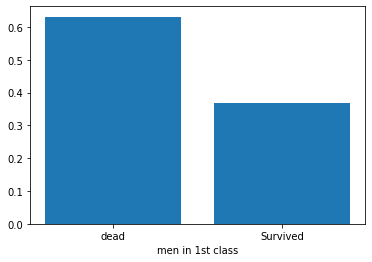

In [185]:
s=Titanic[(Titanic['Sex']=='male') & (Titanic['Pclass']==1)]['Survived'].value_counts(normalize=True)
n=['dead','Survived']
plt.bar(n,s)
plt.xlabel('men in 1st class')
plt.savefig('men in 1st classSurvived.png',dpi=120)

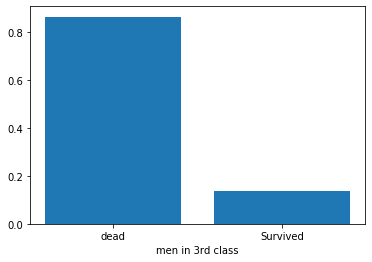

In [184]:
s=Titanic[(Titanic['Sex']=='male') & (Titanic['Pclass']==3)]['Survived'].value_counts(normalize=True)
n=['dead','Survived']
plt.bar(n,s)
plt.xlabel('men in 3rd class')
plt.savefig('men in 3rd classSurvived.png',dpi=120)

we can notice that men in **the first** class were more lucky to survive than those in **the third** class

**Class**

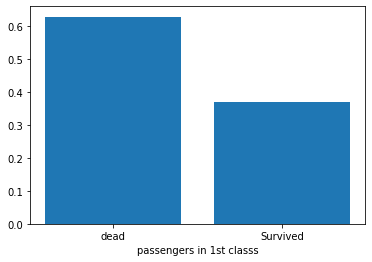

In [195]:
s=Titanic[Titanic['Pclass']==1]['Survived'].value_counts(normalize=True)
n=['dead','Survived']
plt.bar(n,s)
plt.xlabel('passengers in 1st classs')
plt.savefig('passengers in 1st classsSurvived.png',dpi=120)

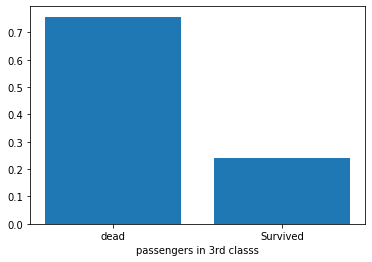

In [196]:
s=Titanic[Titanic['Pclass']==3]['Survived'].value_counts(normalize=True)
n=['dead','Survived']
plt.bar(n,s)
plt.xlabel('passengers in 3rd classs')
plt.savefig('passengers in 3rd classsSurvived.png',dpi=120)

we can notice that passengers in **the first** class were more lucky to survive than those in **the third** class